## Load the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load the Boston House Pricing Dataset

In [2]:
dataset = pd.read_csv("BostonHousing.csv")

In [3]:
print(dataset.keys())

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


## Prepare the Dataset

In [4]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
dataset = dataset.astype('float64')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## statistical summary of the dataset

In [8]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# Missing values
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

There are only 5 null values in feature named "rm" -> number of rooms, So let us fill them with mean value

In [10]:
dataset['rm'] = dataset['rm'].fillna(dataset['rm'].mean())

## Correlation Table

In [11]:
# Exploratory Data Analysis
# correlation
dataset.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219261,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.310847,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.392052,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091434,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302051,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219261,0.310847,-0.392052,0.091434,-0.302051,1.000000,-0.239632,0.202268,-0.210353,-0.292178,-0.356065,0.127998,-0.614526,0.695375
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.239632,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.202268,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210353,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292178,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


From the Correlation Table, we could find that almost all the features are important.    
There are no two independent features with high correlation.    
So we need not have to remove any feature.

## Example Graphs

Text(0.5, 1.0, 'Graph between crime rate and house price')

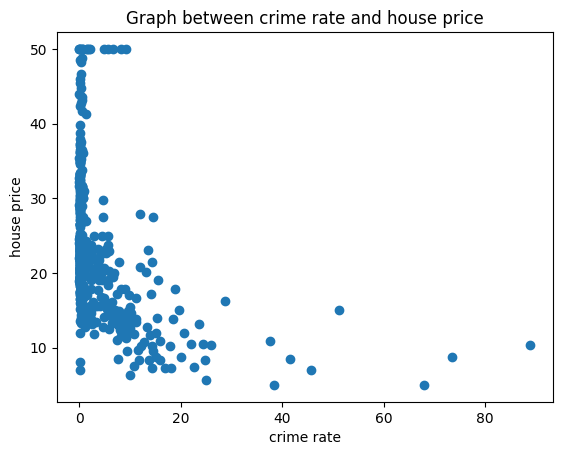

In [12]:
plt.scatter(dataset['crim'],dataset['medv'])
plt.xlabel("crime rate")
plt.ylabel("house price")
plt.title("Graph between crime rate and house price")

The crime rate and house price are negatively correlated.

Text(0.5, 1.0, 'Graph between number of rooms and house price')

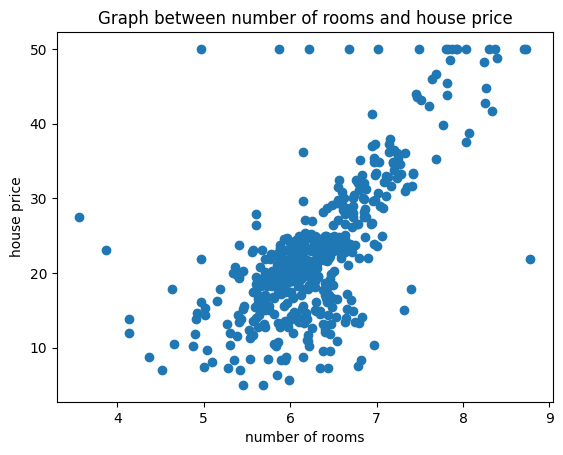

In [13]:
plt.scatter(dataset['rm'],dataset['medv'])
plt.xlabel("number of rooms")
plt.ylabel("house price")
plt.title("Graph between number of rooms and house price")

The number of rooms and house price are positively correlated.

# Regression Plots

Text(0.5, 1.0, 'Regression plot: number of rooms vs. house price')

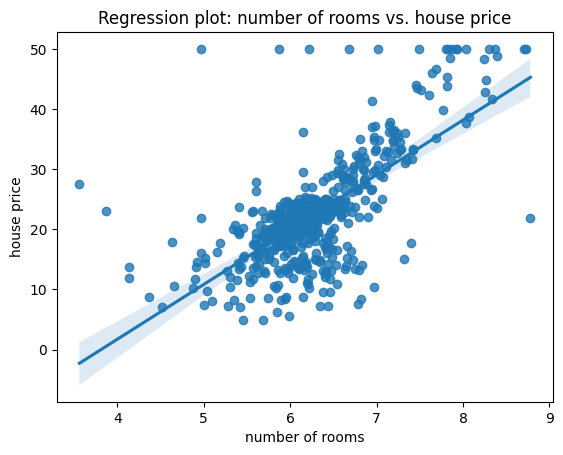

In [14]:
sns.regplot(x="rm",y="medv", data = dataset)
plt.xlabel("number of rooms")
plt.ylabel("house price")
plt.title("Regression plot: number of rooms vs. house price")

Text(0.5, 1.0, 'Regression plot: tax rate vs. house price')

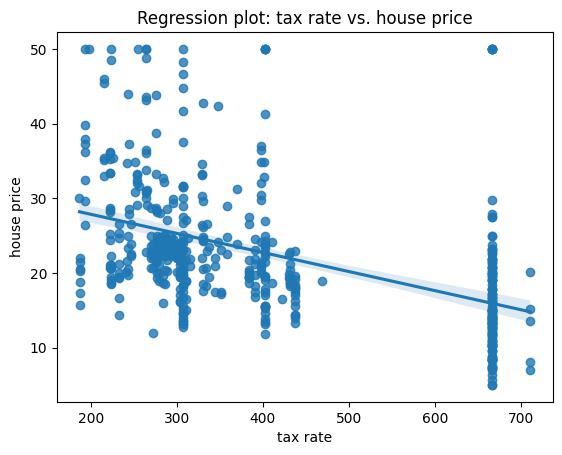

In [15]:
sns.regplot(x="tax",y="medv", data = dataset)
plt.xlabel("tax rate")
plt.ylabel("house price")
plt.title("Regression plot: tax rate vs. house price")

# Train Test Split

In [16]:
# Independent and Dependent Features
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [17]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [19]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [20]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


In [21]:
X_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [22]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [25]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [26]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [27]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Evaluate the model based on R-squared score
    r2 = r2_score(y_test, y_pred)

    results[name] = {'R-squared': r2}
    print(f"{name}:")
    print(f"R-squared: {r2:.4f}")

# Find the best model based on R-squared score
best_model_name = max(results, key=lambda name: results[name]['R-squared'])
print(f"The best performing model is: {best_model_name}")

# Select the best model
best_model = models[best_model_name]

Linear Regression:
R-squared: 0.7101
Gradient Boosting Regressor:
R-squared: 0.8876
Random Forest Regressor:
R-squared: 0.8701
Support Vector Regressor:
R-squared: 0.6500
K-Nearest Neighbors Regressor:
R-squared: 0.7469
Decision Tree Regressor:
R-squared: 0.8296
The best performing model is: Gradient Boosting Regressor


In [29]:
# prediction
reg_predict = best_model.predict(X_test)

In [30]:
reg_predict

array([22.83323048, 30.86260709, 16.33825273, 24.21796977, 17.55690617,
       22.11837872, 18.35008538, 13.84009122, 20.84402485, 20.88575907,
       20.3957291 , 18.97152339,  6.94061203, 21.25626546, 20.92146233,
       25.09512056, 19.08150345,  9.01808907, 45.14287882, 16.69984261,
       23.96838411, 25.34145982, 13.98084315, 21.6027881 , 15.31269959,
       16.85792557, 21.92942662, 13.64164146, 20.13917904, 21.20254134,
       19.8454638 , 23.50919044, 21.497162  , 20.80869497, 14.54738812,
       16.85310806, 33.85497959, 19.52521141, 21.61538701, 23.79585933,
       17.91825131, 30.45542949, 43.65992917, 20.46207225, 22.38123638,
       14.76877173, 16.62596389, 23.61538663, 18.20293024, 27.84238286,
       20.99255669, 37.60283175, 17.06034766, 24.64641261, 47.26168855,
       21.47686236, 15.63185589, 32.1779581 , 21.97953947, 18.66713309,
       20.60816185, 33.21652503, 30.46332518, 20.14519191, 24.64095974,
       18.31997259, 14.77342119, 23.47238788, 28.44157506, 14.73

# Assumptions

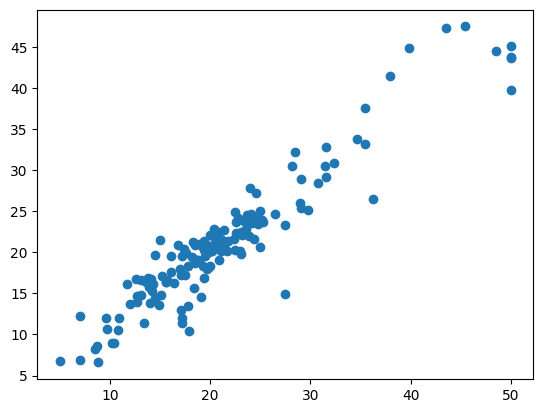

In [31]:
# plot a scatter plot for actual and predicted values
plt.scatter(y_test,reg_predict)

In [32]:
# residuals
residuals = y_test - reg_predict

In [33]:
residuals

173    0.766770
274    1.537393
491   -2.738253
72    -1.417970
452   -1.456906
         ...   
441    4.169301
23     0.028753
225    6.188771
433   -1.846598
447   -4.203508
Name: medv, Length: 152, dtype: float64

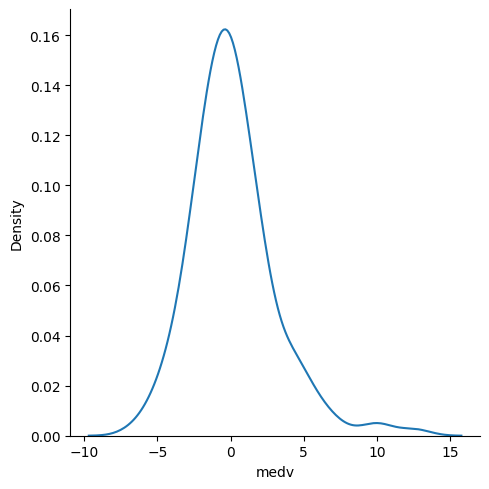

In [34]:
# ploting residuals
sns.displot(residuals,kind='kde')
# the model is good and there are some or very few outliers

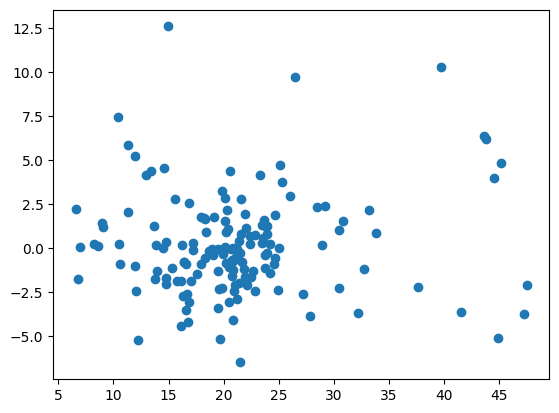

In [35]:
plt.scatter(reg_predict,residuals)
# the points are scattered uniformly showing no particular relationship

In [36]:
# errors
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_absolute_error(y_test,reg_predict))
print(mean_squared_error(y_test,reg_predict))
print(np.sqrt(mean_squared_error(y_test,reg_predict)))

2.070547865120267
8.372700594988785
2.8935619217477937


# R squared and adjusted R squared

formula

r^2 = 1 - ssr/sst

r^2 - coefficiet of determination    
ssr - sum of squares of residuals    
sst - total sum of squares

In [37]:
# r_squared error
from sklearn.metrics import r2_score
r2 = r2_score(y_test,reg_predict)
print(r2)

0.8876345086567653


adjusted r^2 = 1 - [(1-R2) * (n-1) / (n-k-1)]

R2 - R2 of the model   
n - number of observations    
k - number of predictor variables

Note: adjusted R2 is always less than R2

In [38]:
# adjusted r2
ar2 = 1 - (1-r2)*(len(y_test-1))/(len(y_test)-X_test.shape[1]-1)
print(ar2)

0.8762351109842632


The condition adjusted r2 < r2 is satisfied implies the model is good

# New Data Prediction

In [39]:
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [40]:
input_row = dataset.iloc[0, :-1]

input_df = pd.DataFrame([input_row], columns=dataset.columns[:-1])

In [41]:
# standardize new data
scaled = scaler.transform(input_df)

In [42]:
prediction = best_model.predict(scaled)
print(prediction)

[27.84238286]


# Pickling the model file for deployment

In [43]:
import pickle

In [44]:
pickle.dump(best_model,open('regmodel.pkl','wb'))

In [45]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [46]:
pickled_model.predict(scaled)

array([27.84238286])